In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.decomposition as decomposition

In [2]:
df = pd.read_csv("data/diabets.csv", sep='\t')
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [3]:
X0 = df.values[:,2:-1]
# X0 = preprocessing.scale(X0)
print(X0.shape, X0.dtype)

(442, 8) float64


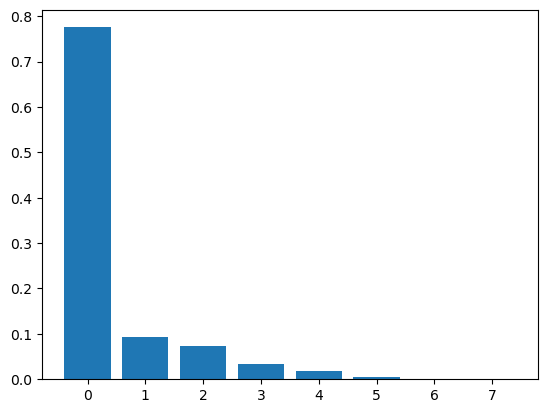

In [4]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)
U0 = pca_sk.transform(X0)
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

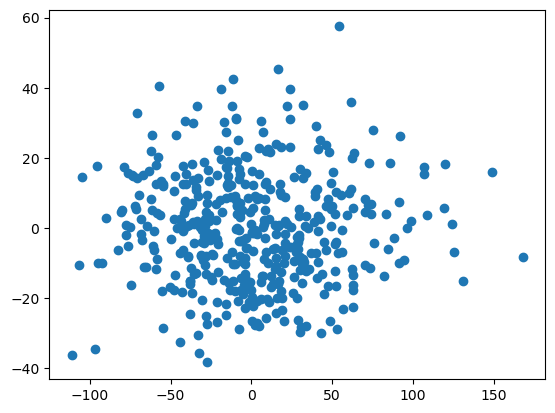

In [5]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

In [6]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

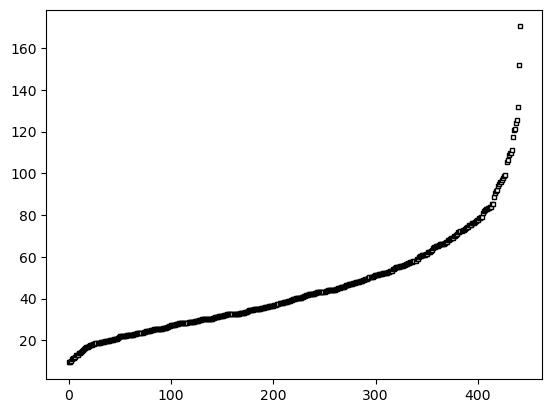

[ 26.376  94.647 189.140 115.439  49.788   4.070   4.641  91.260]


In [7]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.show()
print(c0)

0.9728506787330317


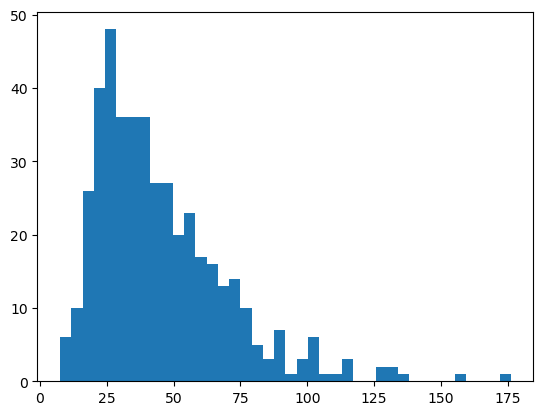

[ 26.194  94.643 184.880 111.587  50.053   3.966   4.613  91.247]


In [23]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

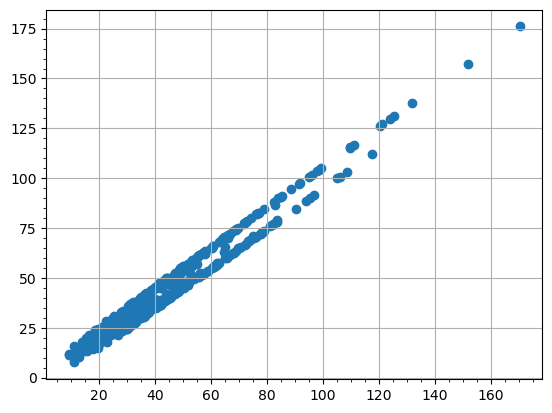

In [24]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [25]:
X1 = X0 - c
X1_0 = X0 - c0

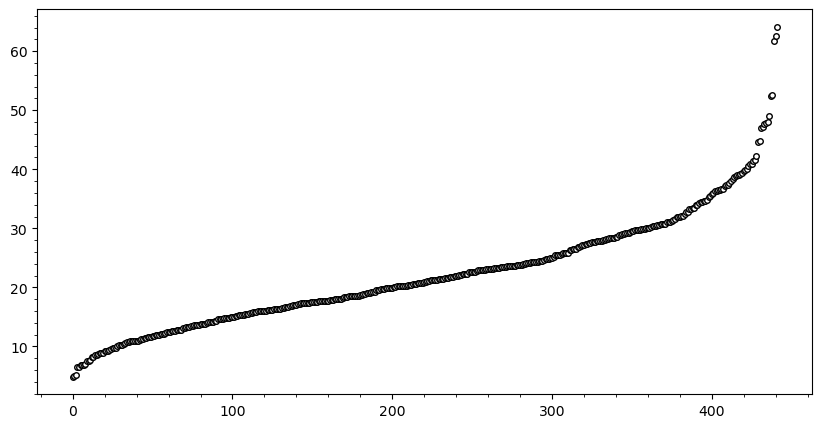

2038.7574754294342 [ 0.027  0.078  0.750  0.649 -0.021  0.018  0.005  0.089]


In [26]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
# plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

0.9728506787330317


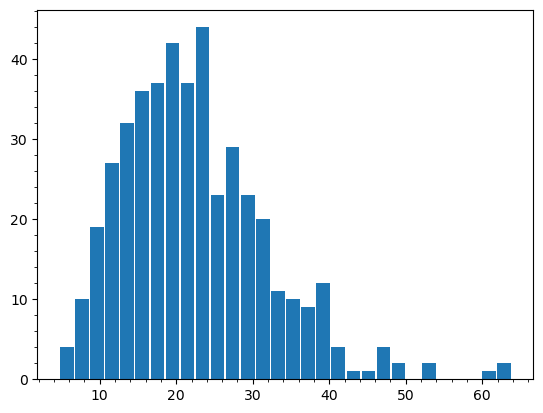

2059.2057710558324 [ 0.025  0.069  0.748  0.654 -0.021  0.018  0.005  0.078]


In [27]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a1, L1 = pca.find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

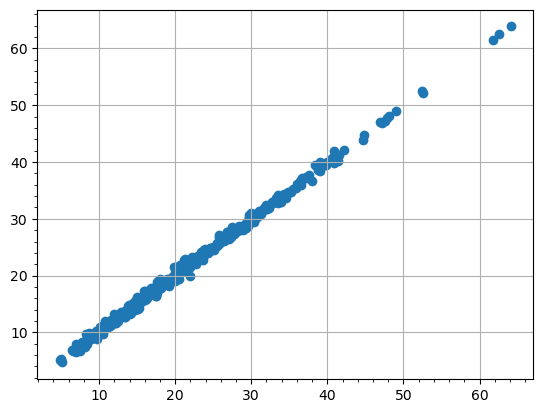

In [28]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [29]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

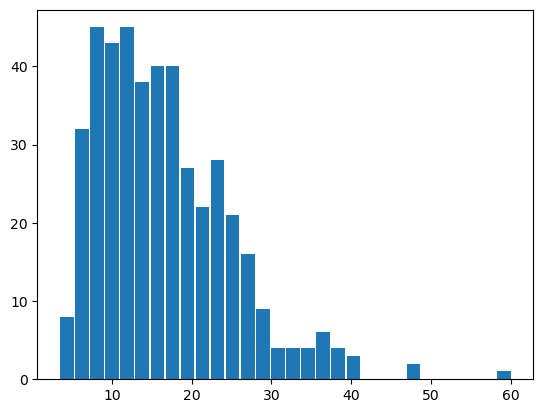

247.42619645356487 [ 0.134  0.559 -0.236  0.135 -0.658  0.045  0.012  0.401]


In [30]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9728506787330317


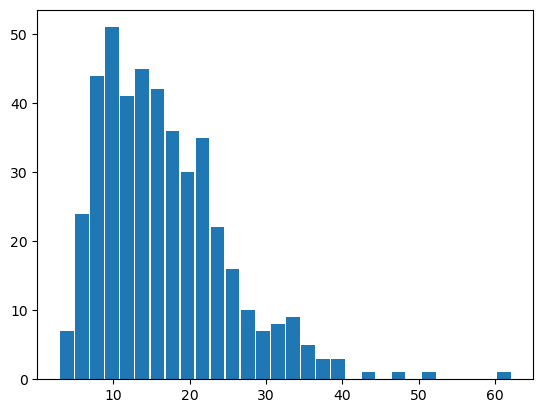

240.5715103673128 [ 0.129  0.636 -0.173  0.055 -0.605  0.043  0.015  0.421]


In [31]:
N = len(X0)
alpha = (N - 12) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.01)))
a2, L2 = pca.find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

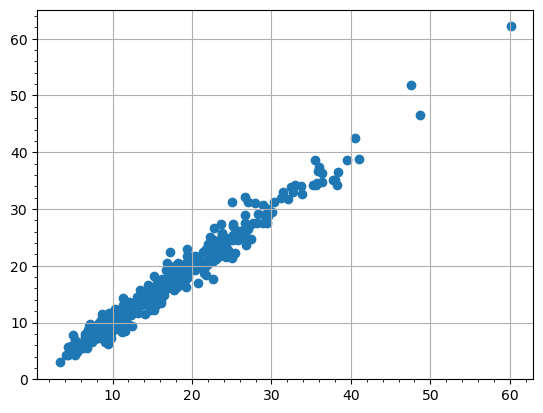

In [32]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

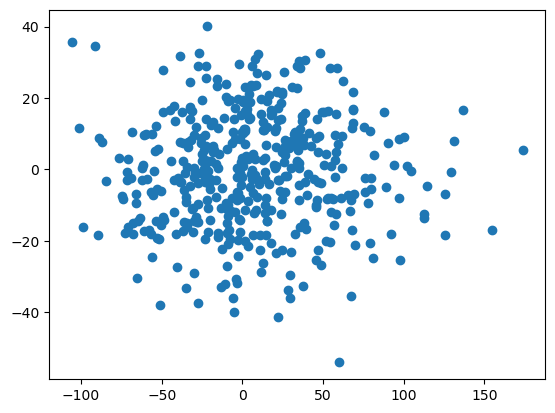

In [33]:
plt.scatter(U1,U2)
plt.show()

In [34]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [35]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.95, 0.001))
S = pca.robust_scatter_matrix(X1, wma)
print(S)

[[ 1.380e+00 -8.718e-02 -1.112e-01  9.629e-02  1.176e-01 -1.910e-01
  -1.021e-02 -8.226e-02]
 [-8.718e-02  1.313e-01 -7.993e-03 -5.224e-03  4.258e-02  5.649e-01
  -8.666e-01 -3.660e-02]
 [-1.112e-01 -7.993e-03  2.029e+00 -1.893e+00 -2.380e+00 -5.219e+00
  -4.405e+01  1.173e-02]
 [ 9.629e-02 -5.224e-03 -1.893e+00  1.831e+00  2.133e+00  2.949e+00
   4.161e+01 -1.026e-02]
 [ 1.176e-01  4.258e-02 -2.380e+00  2.133e+00  3.101e+00  1.045e+01
   5.110e+01 -3.148e-02]
 [-1.910e-01  5.649e-01 -5.219e+00  2.949e+00  1.045e+01  1.067e+02
   6.837e+01 -4.107e-01]
 [-1.021e-02 -8.666e-01 -4.405e+01  4.161e+01  5.110e+01  6.837e+01
   1.107e+03 -1.114e+00]
 [-8.226e-02 -3.660e-02  1.173e-02 -1.026e-02 -3.148e-02 -4.107e-01
  -1.114e+00  1.992e-01]] 147.64008136546195
[[ 1.371e+00 -8.132e-02 -3.765e-02  1.679e-02  1.297e-01  2.102e-01
  -2.325e+00 -8.183e-02]
 [-8.132e-02  1.170e-01 -2.739e-02  8.239e-03  6.950e-02  9.837e-01
  -5.970e-01 -1.723e-02]
 [-3.765e-02 -2.739e-02  2.444e+00 -2.346e+00 -2.7

In [36]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 4.969e-03 -5.100e-03  9.515e-01 -2.818e-01  2.726e-02 -1.060e-01
  -5.660e-02  3.136e-03]
 [-2.033e-03 -4.189e-03 -4.115e-02  1.122e-01  9.383e-02 -7.944e-01
   2.531e-01 -5.309e-01]
 [-4.400e-02  2.227e-02 -1.434e-01 -5.169e-01  7.534e-01  8.852e-02
   3.590e-01  7.371e-02]
 [ 4.250e-02 -1.703e-03  1.384e-01  5.808e-01  6.422e-01  1.003e-01
  -4.474e-01 -1.380e-01]
 [ 4.674e-02 -7.880e-02  2.276e-01  5.057e-01 -1.007e-02  2.890e-01
   7.745e-01  2.460e-02]
 [ 4.934e-02 -9.951e-01 -2.760e-02 -5.496e-02  1.648e-02 -1.876e-02
  -5.314e-02  3.843e-03]
 [ 9.958e-01  5.408e-02 -2.639e-02 -6.644e-02  5.876e-03 -1.553e-02
   2.135e-03  9.064e-03]
 [-2.826e-03  1.428e-03 -5.026e-04  2.007e-01  9.963e-02 -5.057e-01
   3.299e-02  8.324e-01]]


7.396860901565105e-15